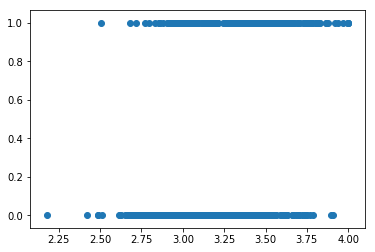

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])

Text(0,0.5,'Probability')

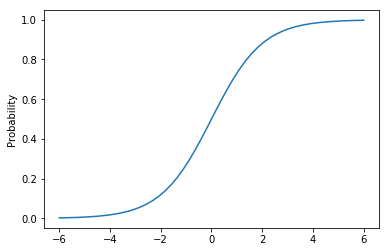

In [23]:
import numpy as np
# Logistic Function
def logistic(x):
    return np.exp(x)  / (1 + np.exp(x)) 
    
x = np.linspace(-6,6,50, dtype=float)
y = logistic(x)

plt.plot(x, y)
plt.ylabel("Probability")

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

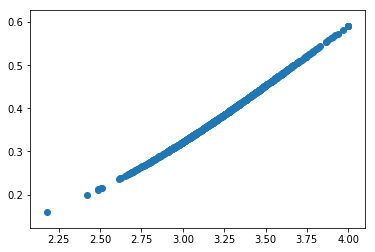

In [25]:
# predict_proba() method returns the predicted probability

logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(x=admissions[["gpa"]], y= pred_probs[:,1])

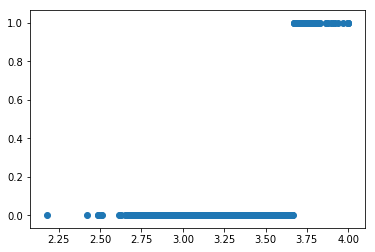

In [26]:
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)

####  evaluating binary classifiers
Accuracy = # of correctly precicted / # observations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    598
1     46
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


In [28]:
admissions["actual_label"] = admissions["admit"]
matches = admissions['predicted_label'] == admissions['actual_label']
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions['actual_label'])
print('\naccuracy: ', accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0

accuracy:  0.6459627329192547


In [29]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_negatives_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negatives_filter])

false_positives_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positives_filter])

# sensitivity (true positive rate, TPR) = TP / (TP + FN): How effective is this model at identifying positive outcomes?
sensitivity = true_positives / (true_positives + false_negatives)

# Specificity (True Negative Rate, TNR)= TN / (TN +FP): How effective is the model at identifying negative outcomes?
specificity = true_negatives / (false_positives + true_negatives)
print('true_positives:', true_positives)
print('true_negatives:', true_negatives)
print('sensitivity:   ', sensitivity)
print('specificity:   ', specificity)

true_positives: 31
true_negatives: 385
sensitivity:    0.12704918032786885
specificity:    0.9625


#### multiclass classification

In [4]:
import pandas as pd
cars = pd.read_csv("auto.csv")
unique_regions = cars['origin'].unique()
print(unique_regions)

[1 3 2]


In [31]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)
dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)
cars = cars.drop(['year', 'cylinders'], axis=1)
cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [34]:
# one-vs-all approach
from sklearn.linear_model import LogisticRegression
unique_origins = cars["origin"].unique()
unique_origins.sort()
models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]

# converting an 3-class classification problem into 3 binary classification problems  
for origin in unique_origins:
    model = LogisticRegression()
    X_train = train[features]
    y_train = train["origin"] == origin
    model.fit(X_train, y_train)
    models[origin] = model

# return the 3 lists of predicted probabilities for the test set and add to the testing_probs Dataframe.
testing_probs = pd.DataFrame(columns = unique_origins)
for origin in unique_origins:
    X_test = test[features]   
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]
print(testing_probs.head())
print('\n', testing_probs.shape)

          1         2         3
0  0.948895  0.042783  0.025734
1  0.857179  0.034164  0.143858
2  0.860465  0.075330  0.074163
3  0.339308  0.320881  0.330995
4  0.880270  0.060655  0.076848

 (118, 3)


In [35]:
# Classify each observation in the test set using the testing_probs Dataframe
predicted_origins = testing_probs.idxmax(axis=1) # .idxmax return index of first occurrence of maximum
print(predicted_origins.shape)
print(predicted_origins.head(10))

(118,)
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    3
9    1
dtype: int64


#### overfitting

In [5]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("../Raw_data/auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def train_and_test(cols):
    lr = LinearRegression()
    lr.fit(filtered_cars[cols], filtered_cars['mpg'])
    predictions = lr.predict(filtered_cars[cols])
    mse = mean_squared_error(filtered_cars['mpg'], predictions)
    variance = np.var(predictions)
    return(mse, variance)

cyl_mse, cyl_var = train_and_test(['cylinders'])
weight_mse, weight_var = train_and_test(['weight'])
print(cyl_mse, cyl_var, weight_mse, weight_var)

24.02017956815553 36.74255887416017 18.6766165974193 42.08612184489641


In [4]:
one_mse, one_var = train_and_test(['cylinders'])
print('one:   ', one_mse, one_var)
two_mse, two_var = train_and_test(['cylinders', 'displacement'])
print('two:   ', two_mse, two_var)     
three_mse, three_var = train_and_test(['cylinders', 'displacement', 'horsepower'])
print('three: ', three_mse, three_var)
four_mse, four_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight'])
print('four:  ', four_mse, four_var)
five_mse, five_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])
print('five:  ', five_mse, five_var)
six_mse, six_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'])
print('six:   ', six_mse, six_var)
seven_mse, seven_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
print('seven: ', seven_mse, seven_var)

one:    24.02017956815553 36.74255887416017
two:    21.282057055586364 39.480681386729316
three:  20.25295483971423 40.50978360260148
four:   17.76386057184385 42.998877870471865
five:   17.76139610540622 43.00134233690939
six:    11.590170981415227 49.17256746090048
seven:  10.847480945000454 49.915257497315146


#### cross validation

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)
        variance_values.append(var)
        mse_values.append(mse)
   
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)

two_mse, two_var = train_and_cross_val(['cylinders', 'displacement'])
three_mse, three_var = train_and_cross_val(['cylinders', 'displacement', 'horsepower'])
four_mse, four_var = train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight'])   
five_mse, five_var = train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])
six_mse, six_var = train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']) 
seven_mse, seven_var = train_and_cross_val(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
print('one:   ', one_mse, one_var)
print('two:   ', two_mse, two_var) 
print('three: ', three_mse, three_var)
print('four:  ', four_mse, four_var)
print('five:  ', five_mse, five_var)
print('six:   ', six_mse, six_var)
print('seven: ', seven_mse, seven_var)

one:    24.02017956815553 36.74255887416017
two:    21.584370274954374 38.90252531375602
three:  20.655622193882955 40.09128795660694
four:   18.169683239081884 42.507643643644386
five:   18.283038517172052 42.598736300146825
six:    12.09968542546712 48.92824696771802
seven:  11.418131971812052 49.90431373098729


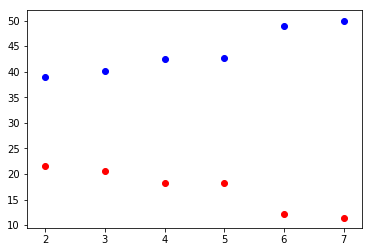

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
plt.scatter([2,3,4,5,6,7], [two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse], color='red')
plt.scatter([2,3,4,5,6,7], [two_var,three_var,four_var,five_var,six_var,seven_var], color='blue')